In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Statements

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# for KNN with scikit-learn:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
!pip install scikit-plot
!pip install mord
!pip install dmba


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
!pip install linearmodels

In [ ]:
world_data = pd.read_csv('/content/drive/MyDrive/Large Data Sets for Python/worlddata.csv')



```
# This is formatted as code
```

# New Section


In [ ]:
gross_enrollment_ratio = world_data[(world_data['IndicatorName']=="Gross enrolment ratio, tertiary, female (%)") ]
gross_enrollment_ratio.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
297732,Arab World,ARB,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,1970,4.16129
297942,Caribbean small states,CSS,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,1970,4.47368
298104,Central Europe and the Baltics,CEB,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,1970,12.33181
298912,Euro area,EMU,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,1970,15.96959
299147,Europe & Central Asia (all income levels),ECS,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,1970,23.87426


In [ ]:
female_labor_force = world_data[(world_data['IndicatorName']=="Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)") ]
gdp_per_capita = world_data[world_data["IndicatorName"] == "GDP per capita (current US$)"]
female_population = world_data[world_data["IndicatorName"] == "Population, female (% of total)"]
female_population.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
72,Arab World,ARB,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,1960,49.612960
149,Caribbean small states,CSS,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,1960,51.325868
220,Central Europe and the Baltics,CEB,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,1960,51.590151
340,East Asia & Pacific (all income levels),EAS,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,1960,49.200500
461,East Asia & Pacific (developing only),EAP,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,1960,49.002760


In [ ]:
maternal_mortality = world_data[world_data["IndicatorName"] == "Maternal mortality ratio (modeled estimate, per 100,000 live births)"]
gdp_per_capita = world_data[world_data["IndicatorName"] == "GDP per capita (current US$)"]
total_female_population = world_data[world_data["IndicatorName"] == "Population, female (% of total)"]

In [ ]:
merged_data = pd.merge(
    maternal_mortality,
    gdp_per_capita,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("_mortality", "_gdp"),
)

merged_data = pd.merge(
    merged_data,
    total_female_population,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("", "_population"),
)

# Rename columns for clarity
merged_data = merged_data.rename(
    columns={
        "Value_mortality": "MaternalMortalityRatio",
        "Value_gdp": "GDPPerCapita",
        "Value": "TotalFemalePopulation",
    }
)

merged_data.head()

,CountryName,CountryCode,IndicatorName_mortality,IndicatorCode_mortality,Year,MaternalMortalityRatio,IndicatorName_gdp,IndicatorCode_gdp,GDPPerCapita,IndicatorName,IndicatorCode,TotalFemalePopulation
0,Arab World,ARB,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,289.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2000.003816,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,49.036236
1,Caribbean small states,CSS,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,94.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2963.161513,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,50.536007
2,Central Europe and the Baltics,CEB,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,41.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2297.201542,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,51.362092
3,East Asia & Pacific (all income levels),EAS,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,159.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2591.048371,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,49.272490
4,East Asia & Pacific (developing only),EAP,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,168.0,GDP per capita (current US$),NY.GDP.PCAP.CD,418.055540,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,49.113487


In [ ]:

merged_data = pd.merge(
    merged_data,
    gross_enrollment_ratio,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("", "_enrollment"),
)
merged_data = pd.merge(
    merged_data,
    female_labor_force,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("", "_labor"),
)

# Rename columns for clarity
merged_data = merged_data.rename(
    columns={
        "Value_enrollment": "GrossEnrollmentRatio",
        "Value_labor": "FemaleLaborForceParticipationRate",
    }
)

merged_data.head()

,CountryName,CountryCode,IndicatorName_mortality,IndicatorCode_mortality,Year,MaternalMortalityRatio,IndicatorName_gdp,IndicatorCode_gdp,GDPPerCapita,IndicatorName,IndicatorCode,TotalFemalePopulation,IndicatorName_enrollment,IndicatorCode_enrollment,Value,IndicatorName_labor,IndicatorCode_labor,FemaleLaborForceParticipationRate
0,Arab World,ARB,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,289.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2000.003816,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,49.036236,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,9.18270,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,20.838339
1,Caribbean small states,CSS,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,94.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2963.161513,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,50.536007,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,8.18636,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,53.203748
2,Central Europe and the Baltics,CEB,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,41.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2297.201542,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,51.362092,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,18.10920,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,53.305153
3,East Asia & Pacific (all income levels),EAS,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,159.0,GDP per capita (current US$),NY.GDP.PCAP.CD,2591.048371,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,49.272490,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,5.86681,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,66.853431
4,East Asia & Pacific (developing only),EAP,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,1990,168.0,GDP per capita (current US$),NY.GDP.PCAP.CD,418.055540,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,49.113487,"Gross enrolment ratio, tertiary, female (%)",SE.TER.ENRR.FE,4.15391,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,69.372303


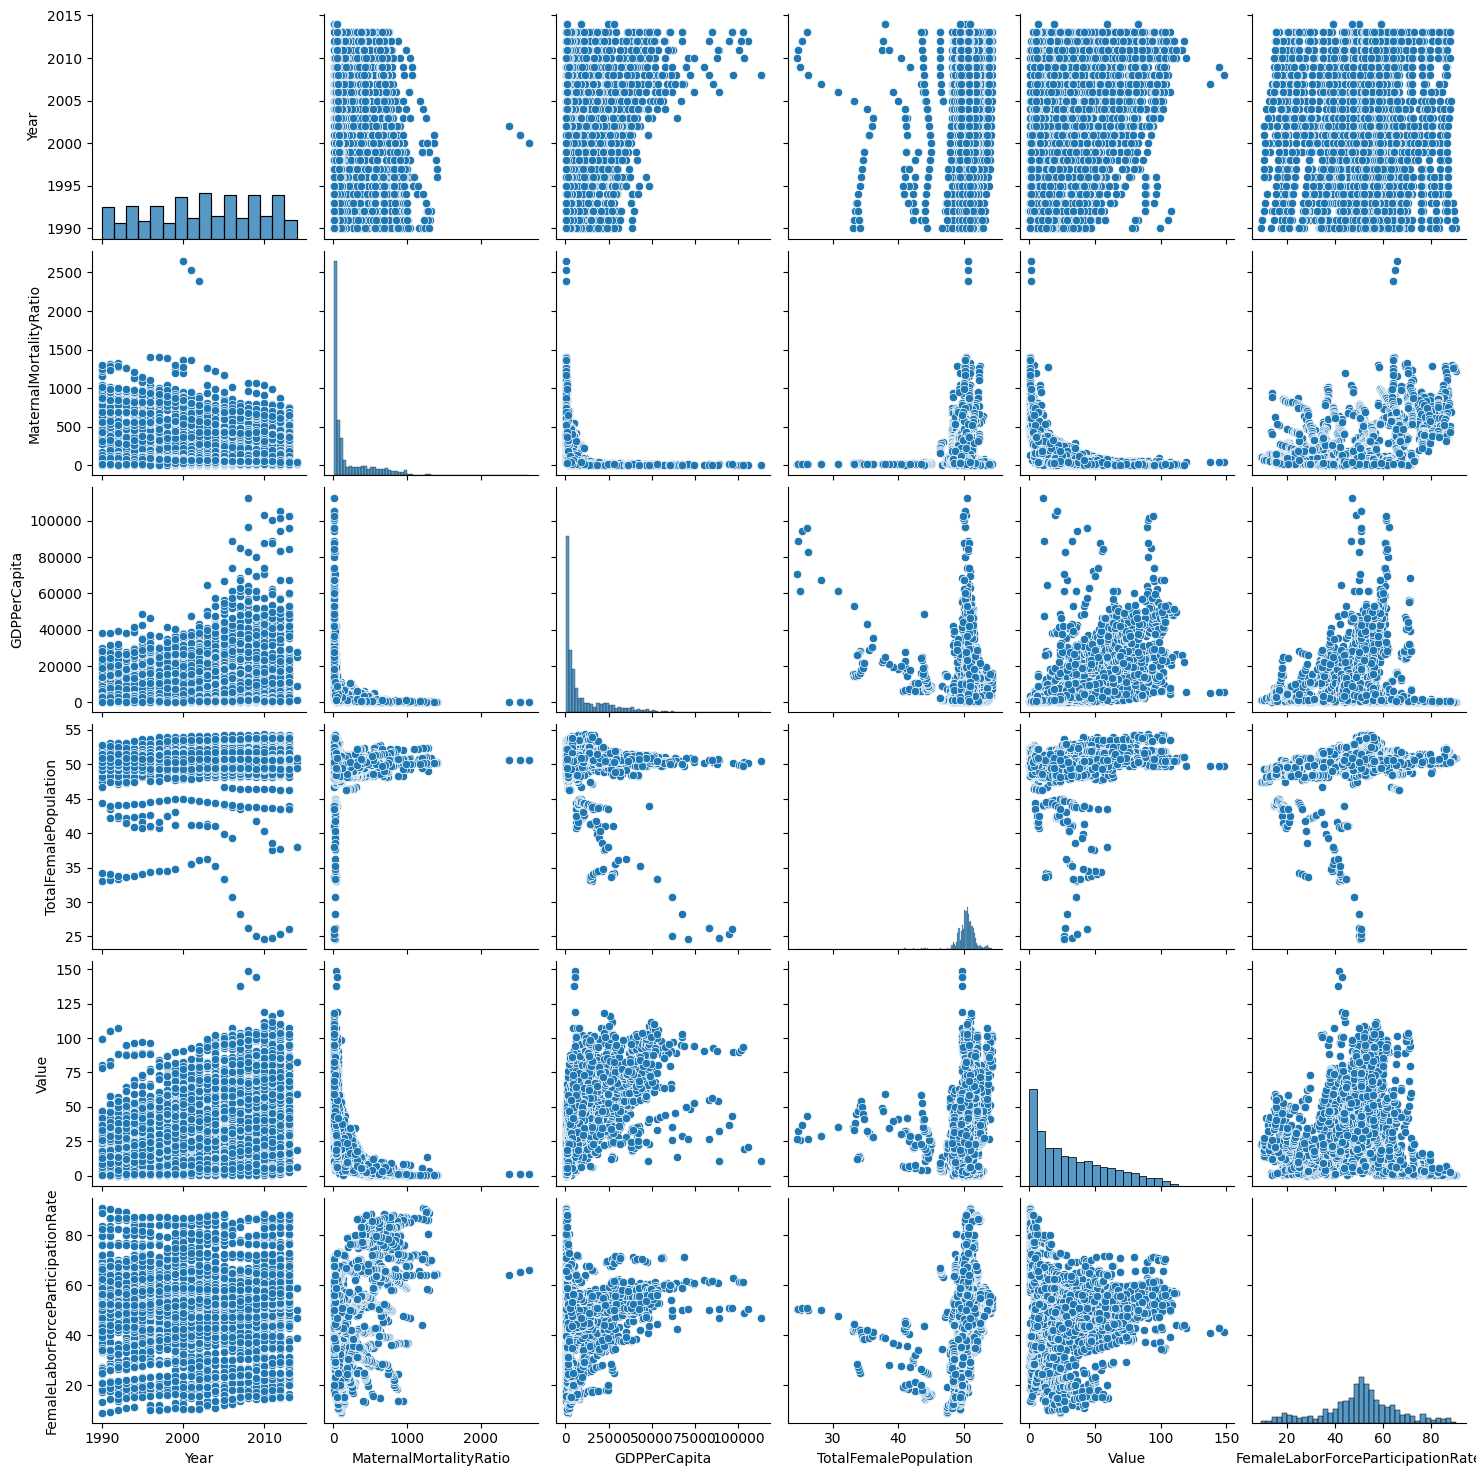

In [ ]:
sns.pairplot(merged_data)

In [ ]:
# gender parity index

In [ ]:
government_expenditure = world_data[(world_data['IndicatorName']=="Government expenditure per tertiary student as % of GDP per capita (%)") ]
female_literacy_rate = world_data[world_data["IndicatorName"] == "Adult literacy rate, population 15+ years, female (%)"]
female_population = world_data[world_data["IndicatorName"] == "Population, female (% of total)"]
household_consumption = world_data[world_data["IndicatorName"] == "Household final consumption expenditure per capita growth (annual %)"]

# Regression Analysis to explain factors influencing Female Tertiary Enrollment


In [ ]:
# Select relevant columns for each DataFrame
government_expenditure = government_expenditure[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'GovernmentExpenditurePerTertiaryStudent'})
female_literacy_rate = female_literacy_rate[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'FemaleLiteracyRate'})
female_population = female_population[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'FemalePopulation'})
household_consumption = household_consumption[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'HouseholdConsumptionGrowth'})
gdp_per_capita = gdp_per_capita[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'GDPPerCapita'})
female_tertiary_enrollment = gross_enrollment_ratio[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'FemaleTertiaryEnrollment'})


# Merge DataFrames
merged_data = pd.merge(government_expenditure, female_literacy_rate, on=['CountryCode', 'CountryName', 'Year'], how='inner')
merged_data = pd.merge(merged_data, female_population, on=['CountryCode', 'CountryName', 'Year'], how='inner')
merged_data = pd.merge(merged_data, household_consumption, on=['CountryCode', 'CountryName', 'Year'], how='inner')
merged_data = pd.merge(merged_data, gdp_per_capita, on=['CountryCode', 'CountryName', 'Year'], how='inner')
merged_data = pd.merge(merged_data, female_tertiary_enrollment, on=['CountryCode', 'CountryName', 'Year'], how='inner')

# Drop redundant columns (if any)
# Assuming you don't need Indicator Name and Indicator Code anymore

merged_data.head()

,CountryCode,CountryName,Year,GovernmentExpenditurePerTertiaryStudent,FemaleLiteracyRate,FemalePopulation,HouseholdConsumptionGrowth,GDPPerCapita,FemaleTertiaryEnrollment
0,MLI,Mali,1998,305.788390,11.893430,50.159984,-1.415214,279.598694,0.623790
1,KGZ,Kyrgyz Republic,1999,24.208481,98.130630,50.694062,-1.170328,258.049340,29.770531
2,BDI,Burundi,2000,775.274475,52.237762,50.695714,-3.256207,128.635536,0.612420
3,KEN,Kenya,2000,207.996216,77.892982,50.144918,-2.834757,408.981868,1.931310
4,LVA,Latvia,2000,22.613400,99.709732,53.991620,3.329934,3351.469058,72.954498


In [ ]:
y = merged_data['FemaleTertiaryEnrollment']

X = merged_data[['FemaleLiteracyRate','GovernmentExpenditurePerTertiaryStudent','FemalePopulation','HouseholdConsumptionGrowth','GDPPerCapita']]
X = sm.add_constant(X)

In [ ]:
#model
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     FemaleTertiaryEnrollment   R-squared:                       0.700
Model:                                  OLS   Adj. R-squared:                  0.687
Method:                       Least Squares   F-statistic:                     57.29
Date:                      Tue, 19 Nov 2024   Prob (F-statistic):           1.67e-30
Time:                              00:01:36   Log-Likelihood:                -525.75
No. Observations:                       129   AIC:                             1063.
Df Residuals:                           123   BIC:                             1081.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -290.0441     55.905     -5.188      0.000    -400.705    -179.384
FemaleLiteracyRate                          0.4618      0.072      6.457      0.000       0.320       0.603
GovernmentExpenditurePerTertiaryStudent    -0.0321      0.014     -2.267      0.025      -0.060      -0.004
FemalePopulation                            5.6063      1.123      4.992      0.000       3.383       7.829
HouseholdConsumptionGrowth                 -0.1850      0.242     -0.763      0.447      -0.665       0.295
GDPPerCapita                                0.0010      0.000      7.072      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.566   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.634
Skew:                          -0.227   Prob(JB):                        0.442
Kurtosis:                       2.689   Cond. No.                     5.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#checking for multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,const,1893.678578
1,FemaleLiteracyRate,1.681951
2,GovernmentExpenditurePerTertiaryStudent,1.478325
3,FemalePopulation,1.070856
4,HouseholdConsumptionGrowth,1.015996
5,GDPPerCapita,1.195942


In [ ]:
#regression analysis on including interaction term
interaction_term = merged_data['FemaleLiteracyRate'] * merged_data['FemalePopulation']
merged_data['InteractionTerm'] = interaction_term
X2 = merged_data[['InteractionTerm','FemaleLiteracyRate','GovernmentExpenditurePerTertiaryStudent','FemalePopulation','HouseholdConsumptionGrowth','GDPPerCapita']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     FemaleTertiaryEnrollment   R-squared:                       0.746
Model:                                  OLS   Adj. R-squared:                  0.734
Method:                       Least Squares   F-statistic:                     59.85
Date:                      Tue, 19 Nov 2024   Prob (F-statistic):           4.95e-34
Time:                              00:01:36   Log-Likelihood:                -514.82
No. Observations:                       129   AIC:                             1044.
Df Residuals:                           122   BIC:                             1064.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    1052.0279    287.530      3.659      0.000     482.835    1621.221
InteractionTerm                             0.3021      0.064      4.745      0.000       0.176       0.428
FemaleLiteracyRate                        -14.7380      3.204     -4.599      0.000     -21.081      -8.395
GovernmentExpenditurePerTertiaryStudent    -0.0228      0.013     -1.730      0.086      -0.049       0.003
FemalePopulation                          -21.0874      5.721     -3.686      0.000     -32.412      -9.763
HouseholdConsumptionGrowth                 -0.3441      0.226     -1.522      0.131      -0.792       0.104
GDPPerCapita                                0.0010      0.000      7.536      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.201   Durbin-Watson:                   2.310
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                0.781
Skew:                          -0.149   Prob(JB):                        0.677
Kurtosis:                       3.238   Cond. No.                     3.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interaction Term:
Coefficient: -9.623e-05
Interpretation: The negative coefficient suggests that the interaction between female literacy rate and female population has a slight negative effect on tertiary enrollment. This could imply that as both literacy and population increase, other factors might limit enrollment, such as resource constraints.
Female Literacy Rate:
Coefficient: 0.4385
Interpretation: A positive and significant effect on tertiary enrollment, indicating that higher literacy rates among women strongly correlate with increased enrollment in tertiary education.
Government Expenditure Per Tertiary Student:
Coefficient: -0.0341
Interpretation: A negative coefficient suggests that higher expenditure per student might not directly translate to increased enrollment. This could indicate inefficiencies or that funds are not reaching the intended beneficiaries effectively.
Female Population:
Coefficient: 6.0939
Interpretation: A strong positive effect, indicating that larger female populations are associated with higher tertiary enrollment, likely due to increased demand for education.
Household Consumption Growth:
Coefficient: 0.3685 (not significant)
Interpretation: While positive, the lack of significance suggests household consumption growth might not have a direct impact on tertiary enrollment rates.
GDP Per Capita:
Coefficient: 0.0013
Interpretation: A significant positive relationship indicates that wealthier countries tend to have higher female tertiary enrollment, reflecting better access to educational resources





## Analysing the effect of female labor force participation on GDP using fixed effects

In [ ]:
female_labor_force = world_data[(world_data['IndicatorName']=="Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)") ]
female_labor_force = female_labor_force[['CountryCode', 'CountryName', 'Year', 'Value']].rename(columns={'Value': 'FemaleLaborForceParticipation'})


In [ ]:

merged_gdp_labor = pd.merge(
    gdp_per_capita,
    female_labor_force,
    on=["CountryCode", "Year", "CountryName"],
    how="inner",
    suffixes=("_gdp", "_labor"),
)

# Rename the value columns for clarity (optional)
merged_gdp_labor = merged_gdp_labor.rename(
    columns={
        "Value_gdp": "GDPPerCapita",
        "Value_labor": "FemaleLaborForceParticipation",
    }
)

# Now 'merged_gdp_labor' contains both GDP per capita and female labor force participation.

merged_gdp_labor.head()

,CountryCode,CountryName,Year,GDPPerCapita,FemaleLaborForceParticipation
0,ARB,Arab World,1990,2000.003816,20.838339
1,CSS,Caribbean small states,1990,2963.161513,53.203748
2,CEB,Central Europe and the Baltics,1990,2297.201542,53.305153
3,EAS,East Asia & Pacific (all income levels),1990,2591.048371,66.853431
4,EAP,East Asia & Pacific (developing only),1990,418.055540,69.372303


In [ ]:
import pandas as pd
from linearmodels.panel import PanelOLS

# Assuming merged_gdp_labor is your DataFrame with panel data

# Set 'CountryCode' and 'Year' as the multi-index for panel data
merged_gdp_labor = merged_gdp_labor.set_index(['CountryCode', 'Year'])

# Define dependent variable and independent variables
y = merged_gdp_labor['GDPPerCapita']
X = merged_gdp_labor[['FemaleLaborForceParticipation']]  # Add more variables if needed

# Add constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the panel OLS model with fixed effects (i.e., country fixed effects)
model = PanelOLS(y, X, entity_effects=True)  # entity_effects=True means country fixed effects
results = model.fit()

# Print the summary of the regression
results.summary

Dep. Variable:,GDPPerCapita,R-squared:,0.1325
Estimator:,PanelOLS,R-squared (Between):,-0.7704
No. Observations:,5187,R-squared (Within):,0.1325
Date:,"Tue, Nov 19 2024",R-squared (Overall):,-0.6067
Time:,00:01:37,Log-likelihood,-5.223e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,758.99
Entities:,217,P-value,0.0000
Avg Obs:,23.903,Distribution:,"F(1,4969)"
Min Obs:,2.0000,,
Max Obs:,25.000,F-statistic (robust):,758.99


# Analysis on Female particition as legislators, senior officials and managers

Creating data set

In [ ]:


# Create a list of indicator names you want to include in the DataFrame
indicators_to_include = [
    "Population in the largest city (% of urban population)",
    "Population, female (% of total)",
    "Population, total",
    "Rural population",
    "Urban population",
    "Urban population (% of total)",
    "GDP per capita (current US$)",
    "Gross domestic income (constant LCU)",
    "Gross domestic savings (constant LCU)",
    "Gross national expenditure (constant LCU)",
    "Household final consumption expenditure (annual % growth)",
    "Gross enrolment ratio, pre-primary, both sexes (%)",
    "Gross enrolment ratio, pre-primary, female (%)",
    "Gross enrolment ratio, primary, both sexes (%)",
    "Gross enrolment ratio, primary, female (%)",
    "Gross enrolment ratio, secondary, both sexes (%)",
    "Gross enrolment ratio, secondary, female (%)",
    "Gross enrolment ratio, tertiary, both sexes (%)",
    "Gross enrolment ratio, tertiary, female (%)",
    "Employment to population ratio, 15+, female (%) (national estimate)",
    "Employment to population ratio, 15+, total (%) (national estimate)",
    "Employment to population ratio, ages 15-24, female (%) (national estimate)",
    "Employment to population ratio, ages 15-24, total (%) (national estimate)",
    "Unemployment, youth female (% of female labor force ages 15-24) (national estimate)",
    "Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",
    "Labor force participation rate for ages 15-24, female (%) (national estimate)",
    "Labor force participation rate for ages 15-24, total (%) (national estimate)",
    "Labor force participation rate, female (% of female population ages 15+) (national estimate)",
    "Labor force participation rate, total (% of total population ages 15+) (national estimate)",
    "Government expenditure per secondary student as % of GDP per capita (%)",
    "Government expenditure per primary student as % of GDP per capita (%)",
    "Lower secondary completion rate, both sexes (%)",
    "Youth literacy rate, population 15-24 years, both sexes (%)",
    "Youth literacy rate, population 15-24 years, female (%)",
    "Expenditure on primary as % of government expenditure on education (%)",
    "Expenditure on secondary as % of government expenditure on education (%)",
    "Expenditure on tertiary as % of government expenditure on education (%)",
    "Adult literacy rate, population 15+ years, both sexes (%)",
    "Adult literacy rate, population 15+ years, female (%)",
    "Enrolment in primary education, both sexes (number)",
    "Enrolment in secondary education, both sexes (number)",
    "Enrolment in secondary general, both sexes (number)",
    "Government expenditure per tertiary student as % of GDP per capita (%)",
    "Female legislators, senior officials and managers (% of total)",
]


# Create an empty DataFrame to store the merged data
merged_indicator_df = pd.DataFrame()

filtered_data = world_data[world_data['IndicatorName'].isin(indicators_to_include)]

# Step 2: Use pivot to reshape the data without aggregation
merged_indicator_df = filtered_data.pivot(
    index=['CountryCode', 'CountryName', 'Year'],
    columns='IndicatorName',
    values='Value'
).reset_index()

# Step 3: Display the resulting DataFrame


merged_indicator_df.head()


IndicatorName,CountryCode,CountryName,Year,"Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)","Employment to population ratio, ages 15-24, female (%) (national estimate)","Employment to population ratio, ages 15-24, total (%) (national estimate)","Enrolment in primary education, both sexes (number)",...,Population in the largest city (% of urban population),"Population, female (% of total)","Population, total",Rural population,"Unemployment, youth female (% of female labor force ages 15-24) (national estimate)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)",Urban population,Urban population (% of total),"Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)"
0,ABW,Aruba,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.977715,54208.0,26683.0,NaN,NaN,27525.0,50.776,NaN,NaN
1,ABW,Aruba,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.962388,55435.0,27296.0,NaN,NaN,28139.0,50.761,NaN,NaN
2,ABW,Aruba,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.967524,56226.0,27694.0,NaN,NaN,28532.0,50.746,NaN,NaN
3,ABW,Aruba,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,50.985061,56697.0,27935.0,NaN,NaN,28762.0,50.730,NaN,NaN
4,ABW,Aruba,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,51.005629,57029.0,28107.0,NaN,NaN,28922.0,50.715,NaN,NaN


In [ ]:
#These are utility tools of the DMBA book.
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart

Colab environment detected.


In [ ]:
merged_indicator_df.isna().sum()

,0
IndicatorName,
CountryCode,0
CountryName,0
Year,0
"Adult literacy rate, population 15+ years, both sexes (%)",12791
"Adult literacy rate, population 15+ years, female (%)",12794
"Employment to population ratio, 15+, female (%) (national estimate)",10616
"Employment to population ratio, 15+, total (%) (national estimate)",10416
"Employment to population ratio, ages 15-24, female (%) (national estimate)",11844
"Employment to population ratio, ages 15-24, total (%) (national estimate)",11825


In [ ]:
merged_indicator_df.shape

(13528, 47)

Data cleaning


In [ ]:
from textwrap import fill
y = merged_indicator_df['Female legislators, senior officials and managers (% of total)']
X = merged_indicator_df.drop(columns=['Female legislators, senior officials and managers (% of total)', 'CountryCode', 'CountryName', 'Year']) # Drop CountryCode and CountryName


threshold = 0.8
columns_to_drop = X.columns[X.isna().mean() > threshold]
X = merged_indicator_df.drop(columns=columns_to_drop)


# Replace missing values with the mean of the column
for column in X.columns:
    if pd.api.types.is_numeric_dtype(X[column]):
        X[column].fillna(X[column].mean(), inplace=True)
X= X.drop(columns=[
'CountryCode'	,
'CountryName',
'Year','Female legislators, senior officials and managers (% of total)'])
y=y.fillna(y.mean())
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


<ipython-input-26-3c728062e8b3>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(X[column].mean(), inplace=True)


Feature selection

In [ ]:
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Employment to population ratio, 15+, female (%) (national estimate), Employment to population ratio, 15+, total (%) (national estimate), Enrolment in primary education, both sexes (number), Enrolment in secondary education, both sexes (number), Enrolment in secondary general, both sexes (number), GDP per capita (current US$), Gross domestic income (constant LCU), Gross domestic savings (constant LCU), Gross enrolment ratio, pre-primary, both sexes (%), Gross enrolment ratio, pre-primary, female (%), Gross enrolment ratio, primary, both sexes (%), Gross enrolment ratio, primary, female (%), Gross enrolment ratio, secondary, both sexes (%), Gross enrolment ratio, secondary, female (%), Gross enrolment ratio, tertiary, both sexes (%), Gross enrolment ratio, tertiary, female (%), Gross national expenditure (constant LCU), Household final consumption expenditure (annual % growth), Labor force participation rate for ages 15-24, female (%) (national estimate), Labor force participa

In [ ]:
X_new=X[best_variables]
X_new.head()


IndicatorName,"Employment to population ratio, 15+, female (%) (national estimate)","Employment to population ratio, 15+, total (%) (national estimate)","Enrolment in primary education, both sexes (number)",Gross domestic savings (constant LCU),"Gross enrolment ratio, pre-primary, both sexes (%)","Gross enrolment ratio, secondary, female (%)","Gross enrolment ratio, tertiary, both sexes (%)","Gross enrolment ratio, tertiary, female (%)",Gross national expenditure (constant LCU),Household final consumption expenditure (annual % growth),"Labor force participation rate for ages 15-24, female (%) (national estimate)","Labor force participation rate for ages 15-24, total (%) (national estimate)","Labor force participation rate, female (% of female population ages 15+) (national estimate)","Labor force participation rate, total (% of total population ages 15+) (national estimate)","Lower secondary completion rate, both sexes (%)","Population, female (% of total)","Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"
0,43.676292,55.317078,2.122263e+07,6.929400e+12,44.567334,61.865637,21.57107,23.73539,5.311702e+13,3.917598,41.94322,48.636773,47.785895,60.563519,59.292171,50.977715,18.595987
1,43.676292,55.317078,2.122263e+07,6.929400e+12,44.567334,61.865637,21.57107,23.73539,5.311702e+13,3.917598,41.94322,48.636773,47.785895,60.563519,59.292171,50.962388,18.595987
2,43.676292,55.317078,2.122263e+07,6.929400e+12,44.567334,61.865637,21.57107,23.73539,5.311702e+13,3.917598,41.94322,48.636773,47.785895,60.563519,59.292171,50.967524,18.595987
3,43.676292,55.317078,2.122263e+07,6.929400e+12,44.567334,61.865637,21.57107,23.73539,5.311702e+13,3.917598,41.94322,48.636773,47.785895,60.563519,59.292171,50.985061,18.595987
4,43.676292,55.317078,2.122263e+07,6.929400e+12,44.567334,61.865637,21.57107,23.73539,5.311702e+13,3.917598,41.94322,48.636773,47.785895,60.563519,59.292171,51.005629,18.595987


Removing multicollinearity

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]
vif_data

,feature,VIF
0,"Employment to population ratio, 15+, female (%...",7.192307
1,"Employment to population ratio, 15+, total (%)...",6.322630
2,"Enrolment in primary education, both sexes (nu...",1.052488
3,Gross domestic savings (constant LCU),3.745423
4,"Gross enrolment ratio, pre-primary, both sexes...",1.671951
5,"Gross enrolment ratio, secondary, female (%)",2.500627
6,"Gross enrolment ratio, tertiary, both sexes (%)",11.391486
7,"Gross enrolment ratio, tertiary, female (%)",10.607136
8,Gross national expenditure (constant LCU),3.766996
9,Household final consumption expenditure (annua...,1.006216


In [ ]:

def calculate_vif(X):
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
  return vif_data

while True:
  vif_df = calculate_vif(X)
  if vif_df['VIF'].max() <= 5:
    break

  highest_vif_column = vif_df.loc[vif_df['VIF'].idxmax(), 'feature']
  print(f"Dropping column '{highest_vif_column}' with VIF: {vif_df['VIF'].max()}")
  X = X.drop(columns=[highest_vif_column])

print("Final columns after VIF reduction:")
X.columns

Dropping column 'Population, total' with VIF: 1808.256369505189
Dropping column 'Gross domestic income (constant LCU)' with VIF: 597.137810328476
Dropping column 'Enrolment in secondary general, both sexes (number)' with VIF: 64.7891850041525
Dropping column 'Enrolment in primary education, both sexes (number)' with VIF: 26.513641551506513
Dropping column 'Gross enrolment ratio, tertiary, both sexes (%)' with VIF: 12.485372534103012
Dropping column 'Gross enrolment ratio, primary, female (%)' with VIF: 10.387444628796185
Dropping column 'Labor force participation rate for ages 15-24, female (%) (national estimate)' with VIF: 10.201999088904467
Dropping column 'Gross enrolment ratio, secondary, both sexes (%)' with VIF: 9.965719696253503
Dropping column 'Gross enrolment ratio, pre-primary, both sexes (%)' with VIF: 9.332761734460973
Dropping column 'Urban population' with VIF: 9.318755075156547
Dropping column 'Employment to population ratio, 15+, female (%) (national estimate)' with VI

Index(['Employment to population ratio, 15+, total (%) (national estimate)',
       'Enrolment in secondary education, both sexes (number)',
       'GDP per capita (current US$)', 'Gross domestic savings (constant LCU)',
       'Gross enrolment ratio, pre-primary, female (%)',
       'Gross enrolment ratio, primary, both sexes (%)',
       'Gross enrolment ratio, secondary, female (%)',
       'Gross enrolment ratio, tertiary, female (%)',
       'Gross national expenditure (constant LCU)',
       'Household final consumption expenditure (annual % growth)',
       'Labor force participation rate for ages 15-24, total (%) (national estimate)',
       'Labor force participation rate, female (% of female population ages 15+) (national estimate)',
       'Labor force participation rate, total (% of total population ages 15+) (national estimate)',
       'Lower secondary completion rate, both sexes (%)',
       'Population in the largest city (% of urban population)',
       'Population, fe

In [ ]:

# indicators_to_include = [
#     'Population, female (% of total)',
#     'Rural population',
#     'Urban population',
#     'GDP per capita (current US$)',
#     'Household final consumption expenditure (annual % growth)',
#     'Employment to population ratio, 15+, female (%) (national estimate)',
#     'Unemployment, youth female (% of female labor force ages 15-24) (national estimate)',
#     'Labor force participation rate for ages 15-24, female (%) (national estimate)',
#     'Labor force participation rate for ages 15-24, total (%) (national estimate)',
#     'Labor force participation rate, female (% of female population ages 15+) (national estimate)',
#     'Youth literacy rate, population 15-24 years, female (%)',
#     'Female legislators, senior officials and managers (% of total)'
# ]


# # Create an empty DataFrame to store the merged data
# new_indicator_df = pd.DataFrame()

# # Loop through the list of indicator names
# for indicator_name in best_variables:
#   # Filter the world_data DataFrame for the current indicator
#   indicator_data = world_data[world_data['IndicatorName'] == indicator_name]

#   # Select relevant columns and rename 'Value' column to the indicator name
#   indicator_data = indicator_data[['CountryCode', 'CountryName', 'Year', 'Value']].rename(
#       columns={'Value': indicator_name}
#   )

#   # Merge the current indicator data with the main DataFrame
#   if new_indicator_df.empty:
#     new_indicator_df = indicator_data
#   else:
#     new_indicator_df = pd.merge(
#         new_indicator_df, indicator_data, on=['CountryCode', 'CountryName', 'Year'], how='inner'
#     )

# #
# # Now merged_indicator_df contains all the selected indicators.
# # You can further process this DataFrame as needed

# new_indicator_df.shape


In [ ]:

#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score
# import scikitplot as skplt

#dmba stuff
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree

# visualization and tuning the aesthetics
import matplotlib.pylab as plt

#for plotting decision trees
import pydotplus as pplus
import graphviz
from IPython.display import Image
from six import StringIO
# if not found: ! pip install six

#for modeling with decision trees
from sklearn.tree import export_graphviz

In [ ]:
#This function helps with drawing decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features,\
                    class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

Decision Tree

In [ ]:

# Drop CountryCode and CountryName
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y, test_size=0.25, random_state=7)
feature_names = X_train.columns.tolist()
print(feature_names)

['Employment to population ratio, 15+, female (%) (national estimate)', 'Employment to population ratio, 15+, total (%) (national estimate)', 'Enrolment in primary education, both sexes (number)', 'Gross domestic savings (constant LCU)', 'Gross enrolment ratio, pre-primary, both sexes (%)', 'Gross enrolment ratio, secondary, female (%)', 'Gross enrolment ratio, tertiary, both sexes (%)', 'Gross enrolment ratio, tertiary, female (%)', 'Gross national expenditure (constant LCU)', 'Household final consumption expenditure (annual % growth)', 'Labor force participation rate for ages 15-24, female (%) (national estimate)', 'Labor force participation rate for ages 15-24, total (%) (national estimate)', 'Labor force participation rate, female (% of female population ages 15+) (national estimate)', 'Labor force participation rate, total (% of total population ages 15+) (national estimate)', 'Lower secondary completion rate, both sexes (%)', 'Population, female (% of total)', 'Unemployment, yout

In [ ]:
DTsalesreg2=DecisionTreeRegressor(max_depth=11, random_state=23)
DTsalesreg2.fit(X_train, Y_train)
# Assuming print_tree and Image are defined elsewhere
# and you want to create a png file using the tree structure
# DTRgraph = print_tree(DTsalesreg2, features=['Employment to population ratio, 15+, female (%) (national estimate)', 'Employment to population ratio, 15+, total (%) (natio)'])
# Image(DTRgraph.create_png())
# The code above is likely incorrect as it is missing the closing bracket for the features list and it also assumes the availability of functions not defined in the code snippet provided.
# Please check the documentation for the library and complete the code accordingly.

DecisionTreeRegressor(max_depth=11, random_state=23)

In [ ]:
DT2_predictions_tr=DTsalesreg2.predict(X_train) # predictions for training set
regressionSummary(Y_train, DT2_predictions_tr)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1.6177
            Mean Absolute Error (MAE) : 0.3718
          Mean Percentage Error (MPE) : -0.7699
Mean Absolute Percentage Error (MAPE) : 1.8582


In [ ]:
# How good is the model if subjected to variations in the training sample?
cvparam = KFold(3, random_state=13, shuffle=True)
scores_mse_DT2 =  cross_validate(DTsalesreg2, X_train, Y_train, \
                                 cv=cvparam, scoring='neg_mean_squared_error')
scores_mse_DT2['test_score']
np.sqrt(scores_mse_DT2['test_score'].mean()*-1)

3.272047722175304

In [ ]:
# How good is the out-of-training-sample (i.e., the test) prediction of the trained model?
DT2_predictions_tt=DTsalesreg2.predict(X_test)
regressionSummary(Y_test, DT2_predictions_tt)


Regression statistics

                      Mean Error (ME) : -0.0184
       Root Mean Squared Error (RMSE) : 3.3382
            Mean Absolute Error (MAE) : 0.8555
          Mean Percentage Error (MPE) : -2.0527
Mean Absolute Percentage Error (MAPE) : 4.5910


In [ ]:
# Bagging: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_bag=RandomForestRegressor(max_features=3, random_state=23) # Bagging is special case of RF, when we use all features (3 in this case).

# Random forest: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_RF=RandomForestRegressor(max_features=2, random_state=23)

# Boosting: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=23)

In [ ]:
# Fit the bagging model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_bag.fit(X_train, Y_train)

# Fit the random forest model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_RF.fit(X_train, Y_train)

# Fit the boosting model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_boost.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=23)

In [ ]:
# Now, get the predicted values and evaluate the training of the new decision tree models:
DTbag_predictions_tr=DTsalesreg_bag.predict(X_train) # predictions for training set

# Now, get the predicted values and evaluate the training of the new decision tree models:
DTRF_predictions_tr=DTsalesreg_RF.predict(X_train) # predictions for training set

# Now, get the predicted values and evaluate the training of the new decision tree models:
DTboost_predictions_tr=DTsalesreg_boost.predict(X_train) # predictions for training set

In [ ]:
# How good is this prediction of bagging in training?
regressionSummary(Y_train, DTbag_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(Y_train, DTRF_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(Y_train,DTboost_predictions_tr)


Regression statistics

                      Mean Error (ME) : -0.0027
       Root Mean Squared Error (RMSE) : 0.9046
            Mean Absolute Error (MAE) : 0.2608
          Mean Percentage Error (MPE) : -0.7032
Mean Absolute Percentage Error (MAPE) : 1.4305

Regression statistics

                      Mean Error (ME) : -0.0047
       Root Mean Squared Error (RMSE) : 0.9129
            Mean Absolute Error (MAE) : 0.2629
          Mean Percentage Error (MPE) : -0.7068
Mean Absolute Percentage Error (MAPE) : 1.4294

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 2.5055
            Mean Absolute Error (MAE) : 0.7694
          Mean Percentage Error (MPE) : -1.9321
Mean Absolute Percentage Error (MAPE) : 4.0412


Feature Importance

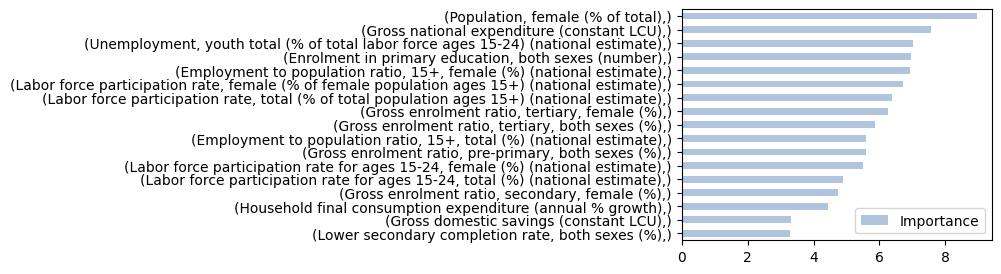

In [ ]:
Importance = pd.DataFrame({'Importance':DTsalesreg_bag.feature_importances_*100}, \
                          index=[feature_names]
)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', ) # kind='barh' : Horizontal bar
plt.gcf().set_size_inches(4, 3)

Partial Dependency plot

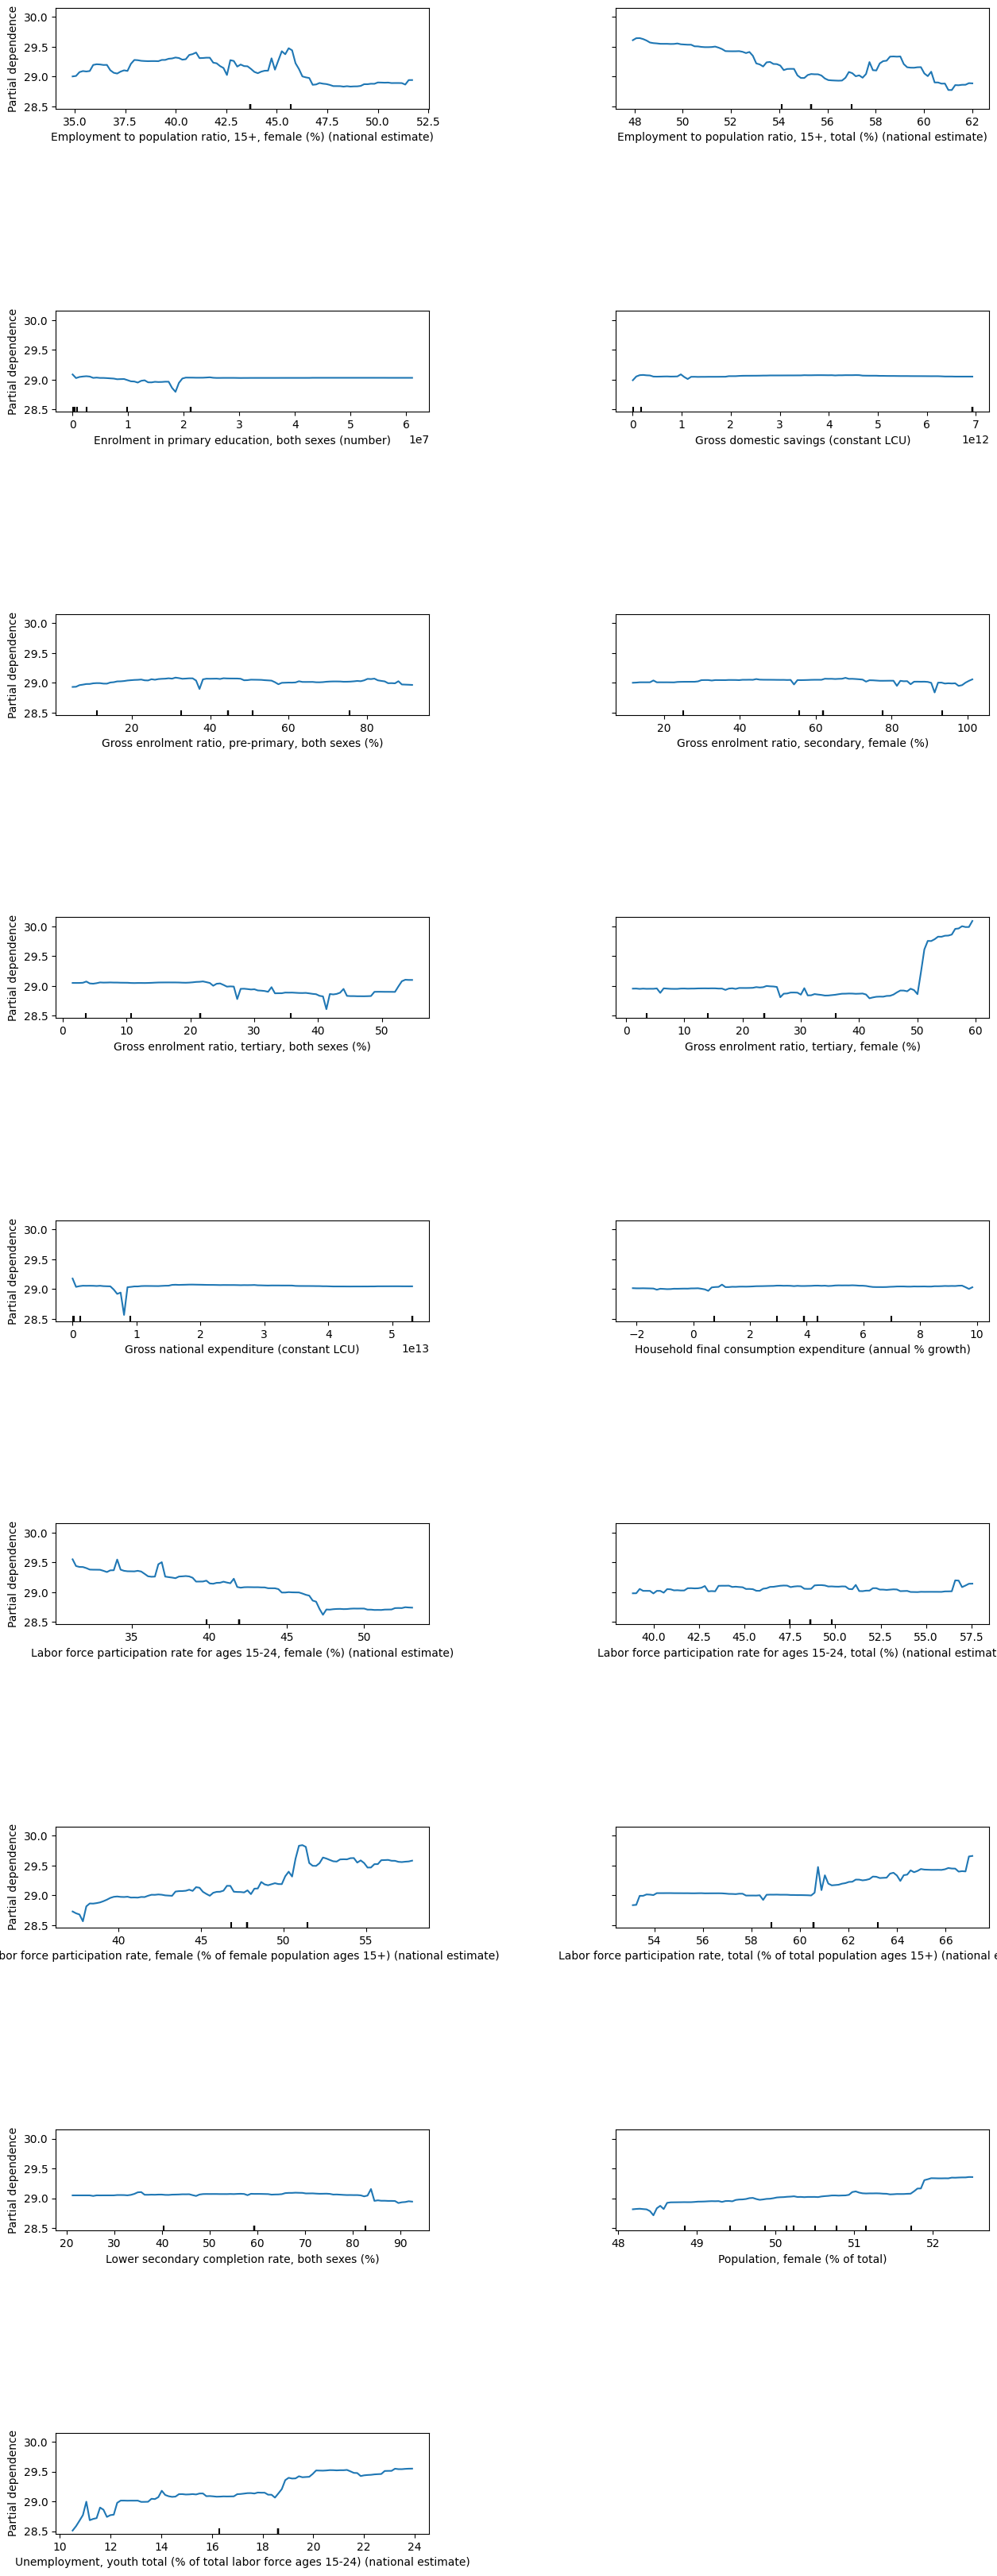

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Define the features you want to plot
features = [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16]  # Use indices for the features

# Increase figure size and adjust layout
fig, ax = plt.subplots(figsize=(15,35))
PartialDependenceDisplay.from_estimator(
    DTsalesreg_bag,
    X_train,
    features,
    n_cols=2,  # Adjust the number of columns
    ax=ax
)
# Adjust the spacing between rows and columns
plt.subplots_adjust(hspace=2, wspace=0.5)  # Increase vertical and horizontal spacing

plt.tight_layout(pad=10.0)  # Add spacing between plots
plt.show()

In [ ]:
import shap

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


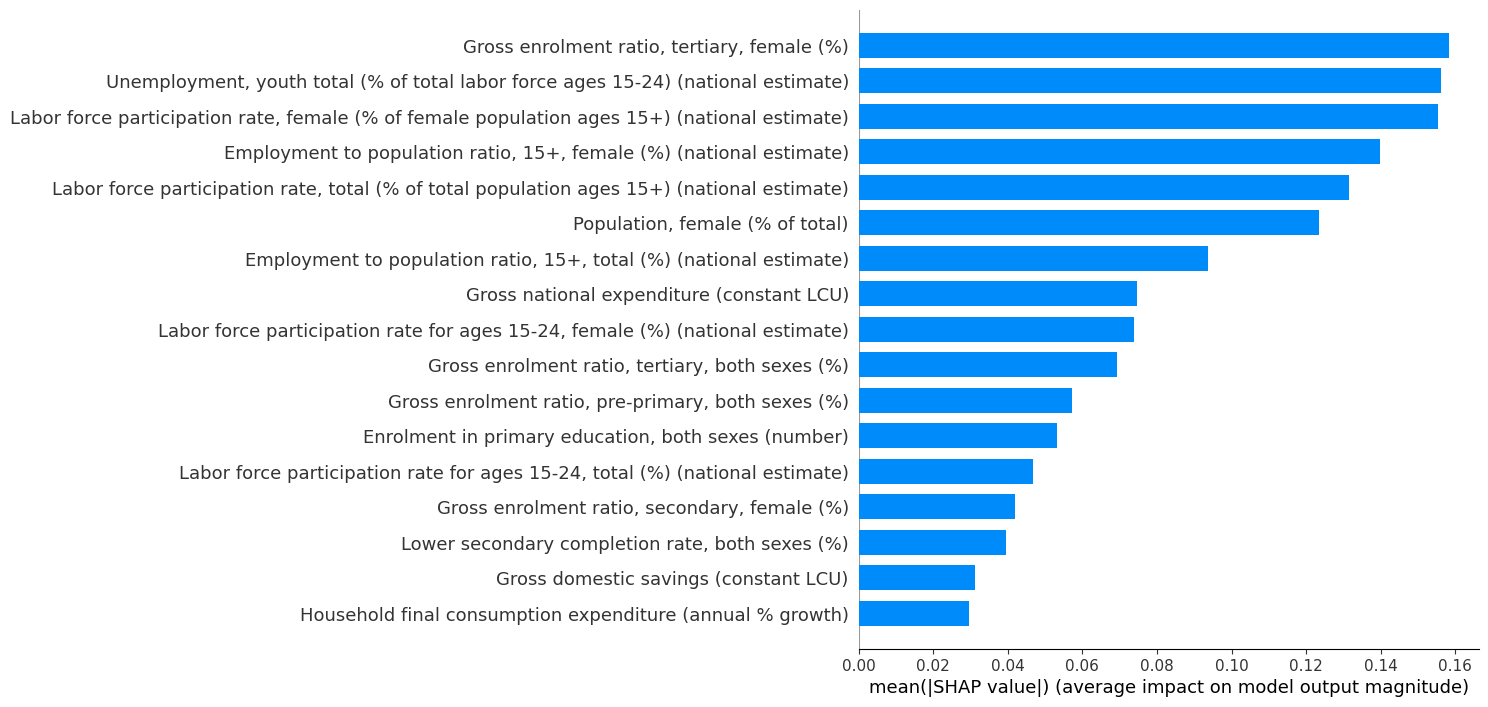

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


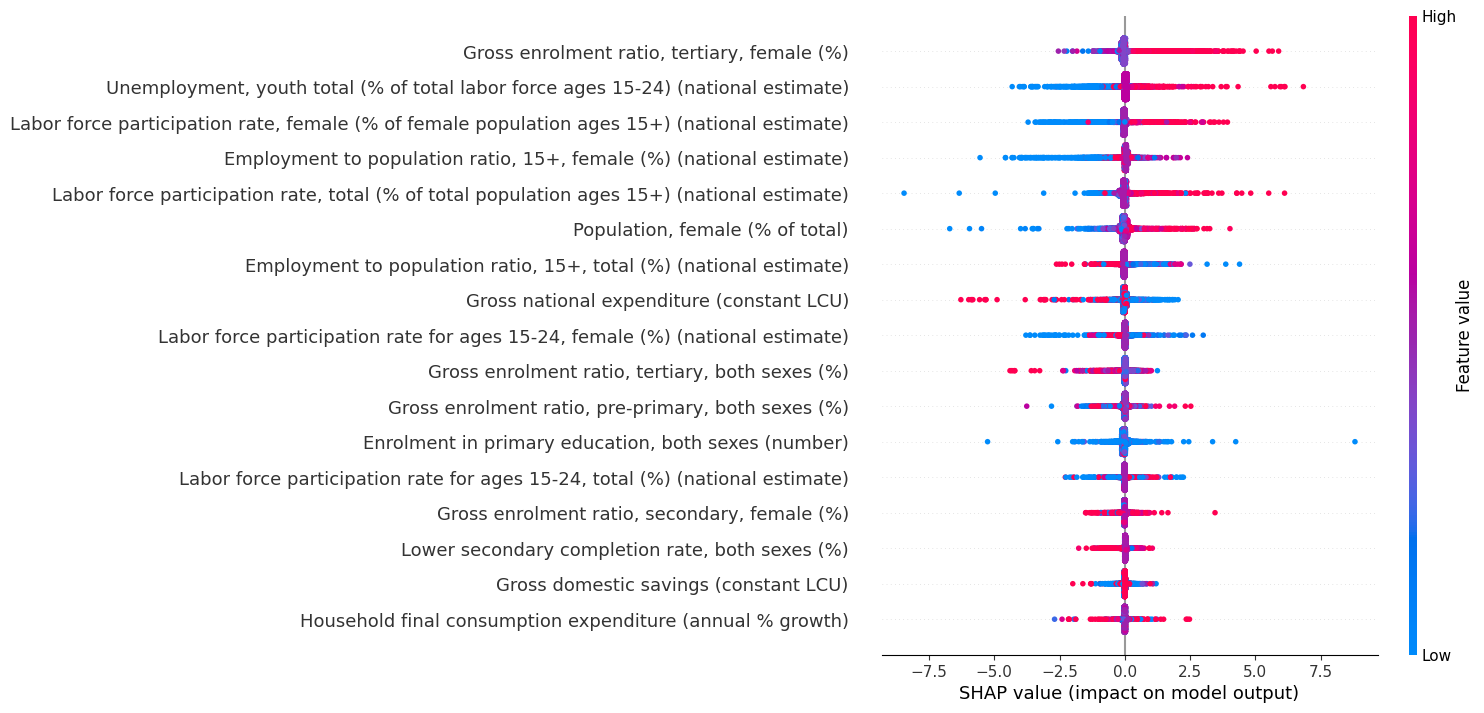

In [ ]:

explainer = shap.TreeExplainer(DTsalesreg_bag)
shap_values=explainer.shap_values(X_train)
expected_value = explainer.expected_value

shap.summary_plot(shap_values, X_train, plot_type="bar")

shap.summary_plot(shap_values, X_train, max_display=30)

NameError: name 'DTsalesreg_boostg' is not defined